In [ ]:
import pyrootutils

In [2]:
import matplotlib.pyplot as plt

In [3]:
import torch 
import torchvision
from torchvision import transforms
from torchvision.transforms import Compose

/work/hpc/miniconda3/envs/nlp/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
pyrootutils.setup_root(search_from=__vsc_ipynb_file__, indicator=".project-root", pythonpath=True)

PosixPath('/work/hpc/potato/movies')

In [5]:
#src/data/components/MLDataset
from src.data.components.MLDataset import MLDataset, MLTransformedDataset
from src.data.components.vocab import Vocab

In [6]:
title_vocab = Vocab("/work/hpc/potato/movies/data/movies/dataset/words.txt")
genre_vocab = Vocab("/work/hpc/potato/movies/data/movies/dataset/genres.txt")

In [7]:
dataset = MLDataset(data_dir="/work/hpc/potato/movies/data/movies/dataset/",
                    img_dir="/work/hpc/potato/movies/data/movies/dataset/ml1m-images/",
                    title_vocab=title_vocab,
                    genre_vocab=genre_vocab,
                    data_type="test")

777


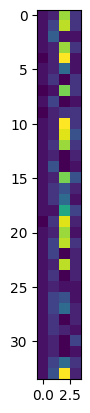

In [8]:
data = dataset[200]
plt.imshow(data['ratings'])

In [13]:
transformed_dataset = MLTransformedDataset(dataset=dataset,
                                           pad_id=0.,
                                           transforms=Compose([transforms.Resize((256, 256)),
                                                               transforms.RandomAffine(degrees=(-10, 10),
                                                                                       translate=(0.1, 0.1),
                                                                                       interpolation=transforms.InterpolationMode.NEAREST),
                                                               transforms.ToTensor()
                                                               ]),
                                           rating_transforms=Compose([transforms.Resize((64, 64), interpolation=transforms.InterpolationMode.NEAREST),
                                                                      transforms.PILToTensor(),
                                                                      transforms.ConvertImageDtype(torch.float32),]),
                                           )

In [14]:
data = transformed_dataset[200]

In [15]:
ratings = data['ratings'].permute(1, 2, 0).numpy()

In [16]:
print(ratings)

[[[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.00392157 0.00784314 0.06666667 0.01176471]
  [0.00392157 0.00784314 0.06666667 0.01176471]
  [0.00392157 0.00784314 0.06666667 0.01176471]]

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.00392157 0.00784314 0.06666667 0.01176471]
  [0.00392157 0.00784314 0.06666667 0.01176471]
  [0.00392157 0.00784314 0.06666667 0.01176471]]

 [[0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  [0.         0.         0.         0.        ]
  ...
  [0.00392157 0.00784314 0.06666667 0.01176471]
  [0.00392157 0.00784314 0.06666667 0.01176471]
  [0.00392157 0.00784314 0.06666667 0.01176471]]

 ...

 [[0.00392157 0.01176471 0.         0.00784314]
  [0.00392157 0.01176471 0.         0.00784314]
  [0.00392

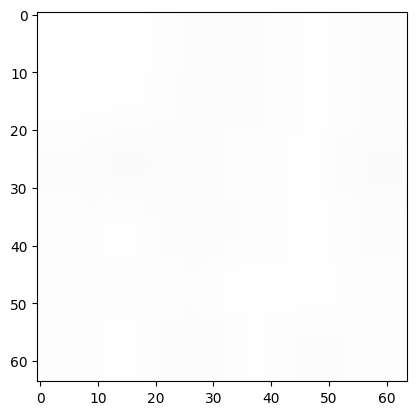

In [25]:
plt.imshow(ratings)